<a href="https://colab.research.google.com/github/BaruBangun/My_Learning/blob/main/Tree_%26_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np

In [42]:
df =  pd.read_csv('/content/car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [43]:
df.head(len(df))

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [44]:
df = df.drop('User ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = CT.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2 , random_state=1)

In [48]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = np.array(SC.fit_transform(X_train))

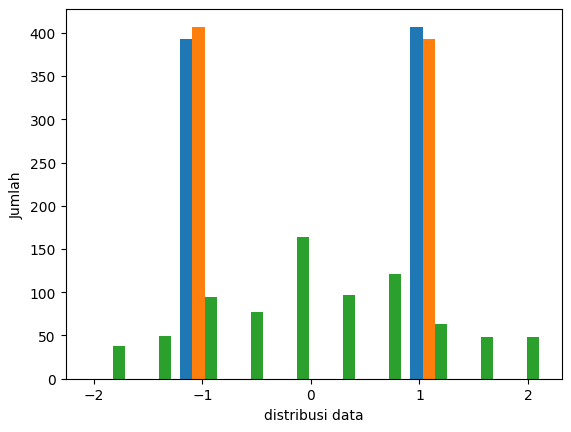

In [67]:
import matplotlib.pyplot as plt
plt.hist(X_train[:,:-1])
plt.ylabel('Jumlah')
plt.xlabel('distribusi data')
plt.show()

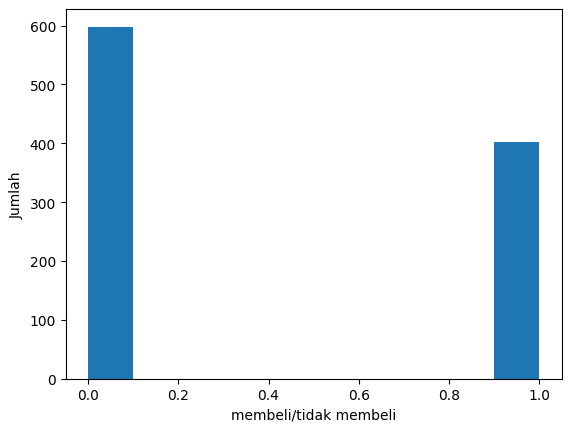

In [69]:
plt.hist(y)
plt.ylabel('Jumlah')
plt.xlabel('membeli/tidak membeli')
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
modelDCT = DecisionTreeClassifier()
modelDCT.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_predDCT = modelDCT.predict(np.array(SC.transform(X_test)))

In [53]:
y_predRFC = modelRFC.predict(np.array(SC.transform(X_test)))

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
CM0 = confusion_matrix(y_test, y_predDCT)
print(CM0)

[[118   7]
 [ 11  64]]


In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
CM1 = confusion_matrix(y_test, y_predRFC)
print(CM1)

[[120   5]
 [  7  68]]


In [57]:
print(classification_report(y_test, y_predDCT))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.90      0.85      0.88        75

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



In [58]:
print(accuracy_score(y_test, y_predDCT))

0.91


In [59]:
print(classification_report(y_test, y_predRFC))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.93      0.91      0.92        75

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



In [60]:
print(accuracy_score(y_test, y_predRFC))

0.94


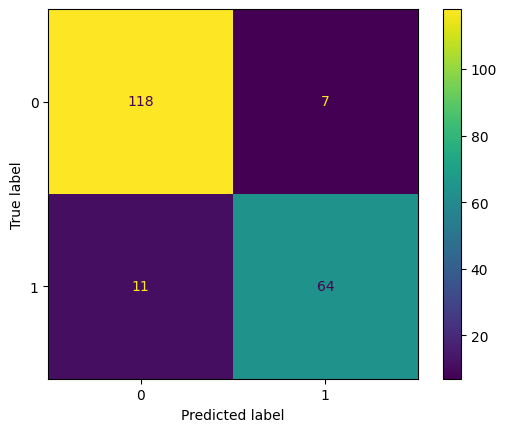

In [64]:
ConfusionMatrixDisplay(CM0).plot()
plt.show()

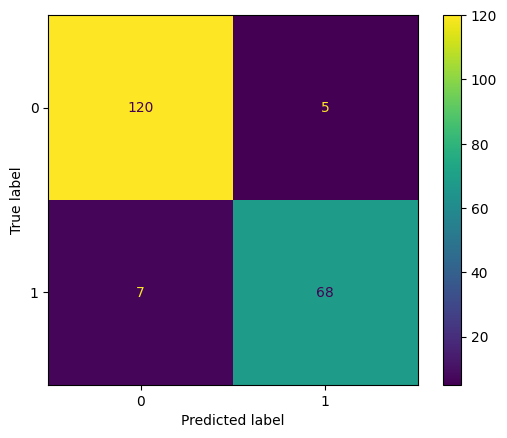

In [63]:
ConfusionMatrixDisplay(CM1).plot()
plt.show()